In [47]:
# Importing Libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [48]:
#Loading the Dataset:
data = pd.read_csv(r"C:\Users\DEll\Documents\New folder\email\spam.csv")

In [49]:
data.head(5)

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [50]:
# Split the data into features and target variable
X = data['text']
y = data['target']

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [53]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Naive Bayes': MultinomialNB()
}

In [54]:
# Train the models and evaluate
results = {}
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)


In [55]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [56]:
 # Store the results
results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [58]:
# Print all model metrics
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  Accuracy : {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall   : {metrics['Recall']:.4f}")
    print(f"  F1 Score : {metrics['F1 Score']:.4f}")

Model Performance:

Naive Bayes:
  Accuracy : 0.9828
  Precision: 1.0000
  Recall   : 0.9475
  F1 Score : 0.9730


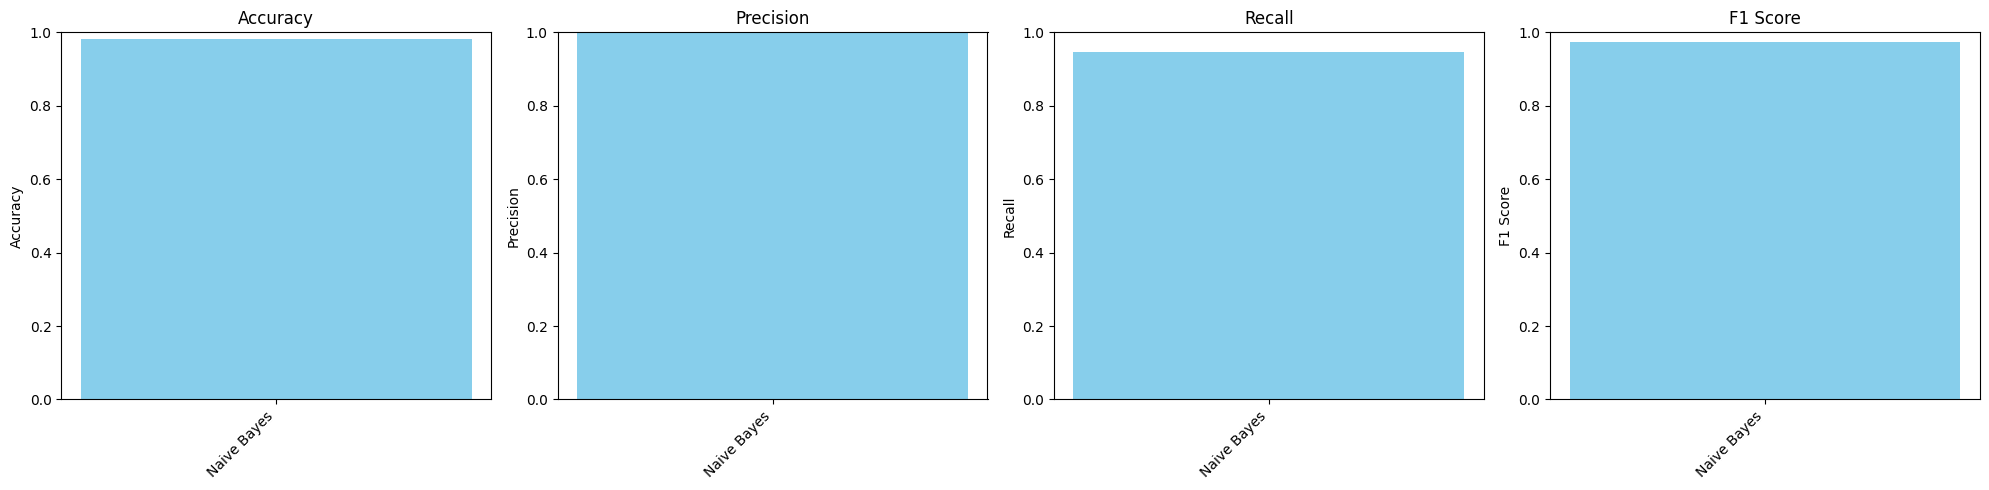

In [59]:
# Plot the performance of each model for each metric
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    ax[i].bar(results.keys(), [result[metric] for result in results.values()], color='skyblue')
    ax[i].set_title(metric)
    ax[i].set_ylim(0, 1)
    ax[i].set_xticks(range(len(results)))
    ax[i].set_xticklabels(results.keys(), rotation=45, ha='right')
    ax[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

In [60]:
# Example prediction for each model
example_email = ["Congratulations! You've won a free gift card. Click here to claim your prize."]
example_tfidf = vectorizer.transform(example_email)

for model_name, model in models.items():
    prediction = model.predict(example_tfidf)
    print(f"\nExample Prediction by {model_name}:")
    print(f"Email: {example_email[0]}")
    print("Predicted as:", "Spam" if prediction[0] == 1 else "Ham")


Example Prediction by Logistic Regression:
Email: Congratulations! You've won a free gift card. Click here to claim your prize.
Predicted as: Spam

Example Prediction by Random Forest:
Email: Congratulations! You've won a free gift card. Click here to claim your prize.
Predicted as: Spam

Example Prediction by SVM:
Email: Congratulations! You've won a free gift card. Click here to claim your prize.
Predicted as: Spam

Example Prediction by Naive Bayes:
Email: Congratulations! You've won a free gift card. Click here to claim your prize.
Predicted as: Spam
